# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Pandas](#Section-1)
- [Section 2 &ndash; Data Wrangling](#Section-2)
- [Section 3 &ndash; Data Visualization](#Section-3)

--- 

### Section 1

#### Exercise 1.1
##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [647]:
import pandas as pd

taxiTripData = pd.read_csv('Week04/data/2019_Yellow_Taxi_Trip_Data.csv')
taxiTripData.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


#### Exercise 1.2
##### Find the dimensions (number of rows and number of columns) in the data.

In [648]:
rows = len(taxiTripData.index)
columns = len(taxiTripData.columns)
rows, columns

(10000, 18)

#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [649]:
taxiTripData[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [650]:
s = taxiTripData['trip_distance'].max()
b = taxiTripData[taxiTripData['trip_distance'] == s]
b[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,1.0,1.00,1.00,1.00
mean,176.0,18.29,6.12,201.21
std,NaN,NaN,NaN,NaN
min,176.0,18.29,6.12,201.21
25%,176.0,18.29,6.12,201.21
50%,176.0,18.29,6.12,201.21
75%,176.0,18.29,6.12,201.21
max,176.0,18.29,6.12,201.21


---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [651]:

meteorites = pd.read_csv('Week04/data/Meteorite_Landings.csv')
meteorites = meteorites.rename(columns={'mass (g)': 'mass'})
column1 = meteorites.columns.str.contains('id%|reclong', regex=True)
column2 = meteorites.columns.str.contains('id%|reclat', regex=True)
column1_to_drop = meteorites.columns[column1]
column2_to_drop = meteorites.columns[column2]
meteorites = meteorites.drop(columns=column1_to_drop)
meteorites = meteorites.drop(columns=column2_to_drop)
meteorites.sort_values("mass")

,name,id,nametype,recclass,mass,fall,year,GeoLocation
31063,Österplana 050,56149,Relict,Relict OC,0.0,Found,01/01/2003 12:00:00 AM,"(58.58333, 13.43333)"
31062,Österplana 049,56148,Relict,Relict OC,0.0,Found,01/01/2012 12:00:00 AM,"(58.58333, 13.43333)"
31075,Österplana 062,56161,Relict,Relict OC,0.0,Found,01/01/2010 12:00:00 AM,"(58.58333, 13.43333)"
12640,Gove,52859,Relict,Relict iron,0.0,Found,01/01/1979 12:00:00 AM,"(-12.26333, 136.83833)"
31064,Österplana 051,56150,Relict,Relict OC,0.0,Found,01/01/2006 12:00:00 AM,"(58.58333, 13.43333)"
...,...,...,...,...,...,...,...,...
38282,Wei-hui-fu (a),24231,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM,NaN
38283,Wei-hui-fu (b),24232,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM,NaN
38285,Weiyuan,24233,Valid,Mesosiderite,NaN,Found,01/01/1978 12:00:00 AM,"(35.26667, 104.31667)"
41472,Yamato 792768,28117,Valid,CM2,NaN,Found,01/01/1979 12:00:00 AM,"(-71.5, 35.66667)"


#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [652]:
meteorites["year"] = meteorites["year"].str.slice(6, 10)
meteorites["year"] = pd.to_numeric(meteorites["year"])
meteorites["year"]
meteorites["SeenBefore1970"] = meteorites["year"] < 1970
meteorites["SeenBefore1970"]

0         True
1         True
2         True
3        False
4         True
         ...  
45711    False
45712    False
45713     True
45714    False
45715    False
Name: SeenBefore1970, Length: 45716, dtype: bool

In [653]:
# meteorites.index = meteorites["id"]
# meteorites.index

In [654]:
# subset = meteorites.loc[(meteorites.index >= 10036) & (meteorites.index <= 10040)]
# subset

#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [655]:
filtered_meteorites = meteorites[(meteorites['year'] >= 2005) & (meteorites['year'] <= 2009)]

pivot_table = filtered_meteorites.pivot_table(
    index='year',
    columns='fall',
    values='mass',
    aggfunc=[
        'count',
        lambda x: x.quantile(0.95)
    ]
)
pivot_table.columns = [
    'Number Fell', '95th Percentile that fell', 
    'Number Found', '95th Percentile that were found'
]
print(pivot_table)

        Number Fell  95th Percentile that fell  Number Found  \
year                                                           
2005.0          NaN                      874.0           NaN   
2006.0          5.0                     2450.0       25008.0   
2007.0          8.0                     1181.0       89675.0   
2008.0          9.0                      948.0      106000.0   
2009.0          5.0                     1492.0        8333.4   

        95th Percentile that were found  
year                                     
2005.0                          4500.00  
2006.0                          1600.50  
2007.0                          1126.90  
2008.0                          2274.80  
2009.0                          1397.25  


--- 

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

<Axes: >

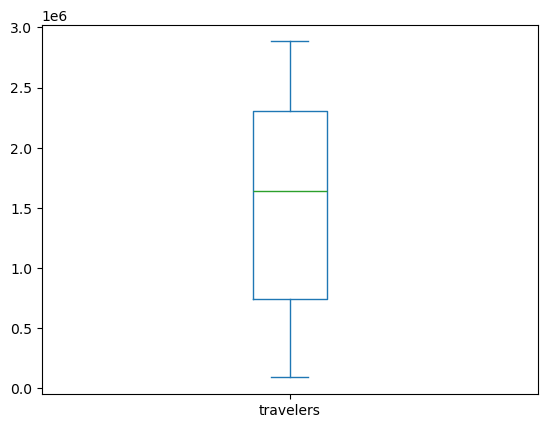

In [656]:
tsa_melted_holiday_travel = pd.read_csv(
    'Week04/data/tsa_melted_holiday_travel.csv', 
    parse_dates=True, index_col='date'
)
tsa_melted_holiday_travel.plot(kind='box', y='travelers', x='year', grid=False)


#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

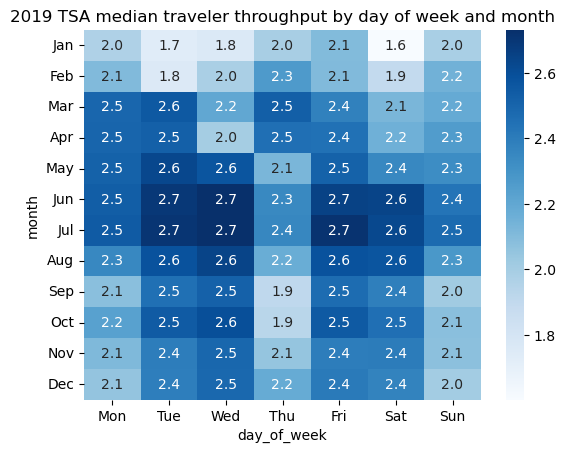

In [657]:
import seaborn as sns
import calendar

data_2019 = tsa_melted_holiday_travel[tsa_melted_holiday_travel['year'] == 2019]

data_2019 = data_2019\
.assign(month=data_2019.index.month,day_of_week=data_2019.index.dayofweek)\
.pivot_table(index='month', columns='day_of_week', values='travelers', aggfunc='median')

ax = sns.heatmap(data=data_2019 / 1e6, cmap='Blues', annot=True, fmt='.1f')
_ = ax.set_yticklabels(calendar.month_abbr[1:], rotation=0)
_ = ax.set_xticklabels(calendar.day_abbr, rotation=0)
_ = ax.set_title('2019 TSA median traveler throughput by day of week and month')


#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.

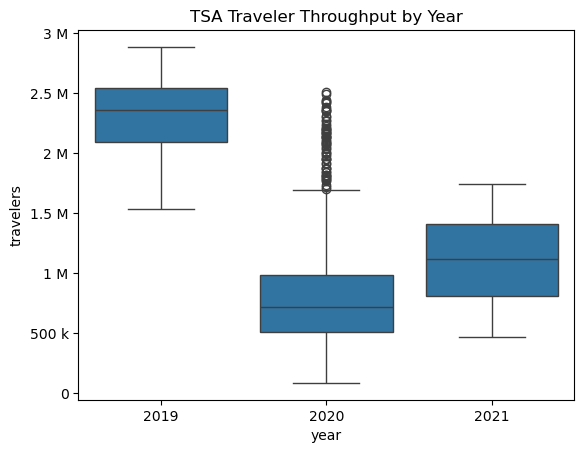

In [659]:
from matplotlib import ticker
plot_data = tsa_melted_holiday_travel.loc['2019':'2021']

ax = sns.boxplot(x='year', y='travelers', data=plot_data)

ax.set_title('TSA Traveler Throughput by Year')
ax.set_ylabel('travelers')
ax.yaxis.set_major_formatter(ticker.EngFormatter())

xticks = [tick.get_text() for tick in ax.get_xticklabels()]

for i, year in enumerate(xticks, start=1):
    median_value = plot_data.loc[plot_data['year'] == year, 'travelers'].median()
    ax.annotate(
        f'Median: {median_value / 1e6:.2f} M',
        xy=(i, median_value),
        xytext=(i, median_value + 0.1 * median_value),
        ha='center',
        arrowprops={'arrowstyle': '->'}
    )